In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [3]:
adress = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(adress)
# Assuming 'data' is your dataset loaded into a Pandas DataFrame

# Descriptive Statistics
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


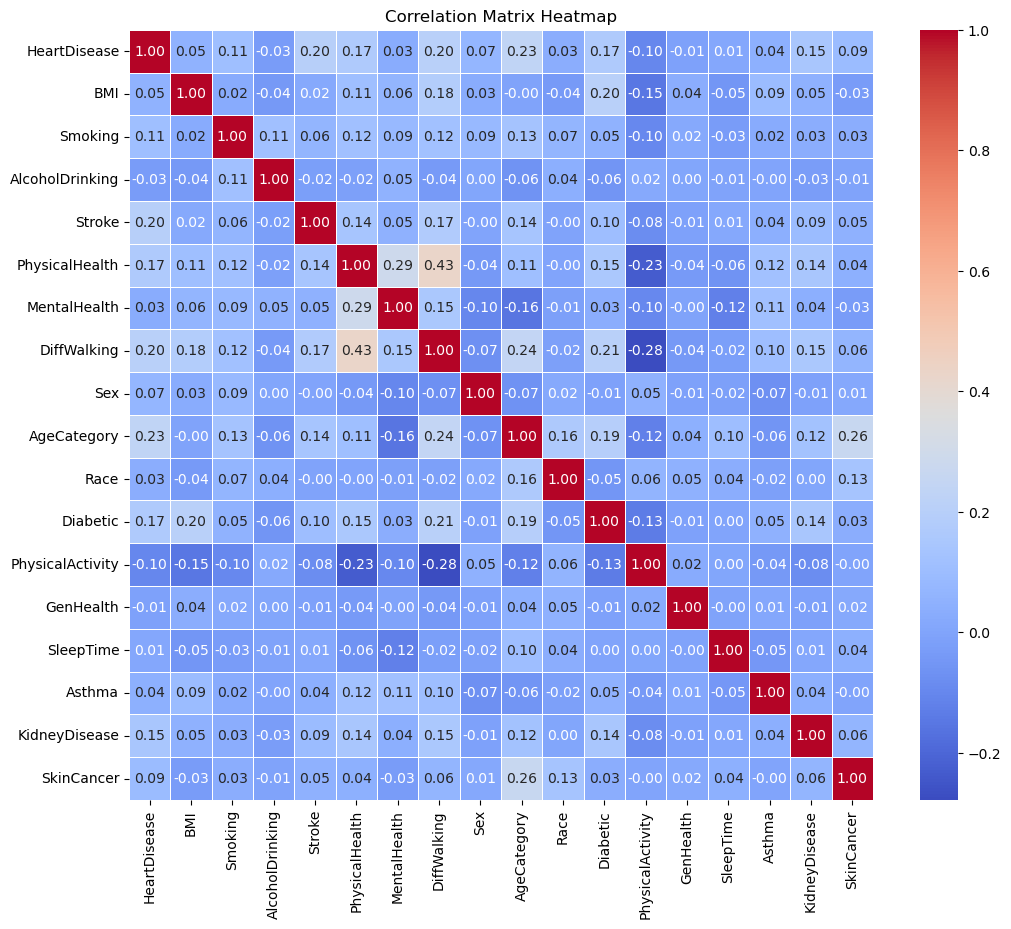

In [30]:



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables as numbers
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])

# Create correlation matrix including all columns
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
address = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(address)

# Perform chi-square analysis for all pairs of categorical variables
results = {}
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Exclude the same column
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[(col1, col2)] = {'Chi-square': chi2, 'P-value': p}

# Print results
for pair, result in results.items():
    print(f"Chi-square statistic for {pair}: {result['Chi-square']}, P-value: {result['P-value']}")
#In a chi-square test, a low p-value suggests association or dependence between variables.


Chi-square statistic for ('HeartDisease', 'Smoking'): 3713.0331469808216, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'AlcoholDrinking'): 328.64916890132054, P-value: 1.892352227090306e-73
Chi-square statistic for ('HeartDisease', 'Stroke'): 12386.4888802668, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'DiffWalking'): 12951.153005437296, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'Sex'): 1568.3069168517372, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'AgeCategory'): 19299.92039113256, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'Race'): 844.3148859632537, P-value: 2.9886131565632597e-180
Chi-square statistic for ('HeartDisease', 'Diabetic'): 10959.86127652373, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'PhysicalActivity'): 3199.008157559494, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'GenHealth'): 21542.177361455, P-value: 0.0
Chi-square statistic for ('HeartDisease', 'Asthma'): 548.8508413264418, P-value: 

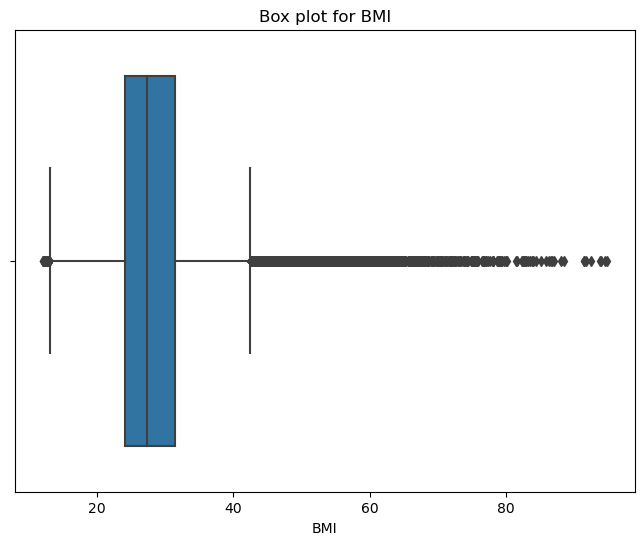

Summary statistics for BMI:
count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
Number of outliers for BMI: 5003
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
57               No  46.52     Yes              No     No            30.0   
105              No  58.54      No              No     No            30.0   
176              No  46.87     Yes             Yes     No             0.0   
229              No  49.26      No              No     No            20.0   
254              No  53.09      No              No     No            30.0   
...             ...    ...     ...             ...    ...             ...   
319590           No  62.42      No              No     No             0.0   
319636           No  47.55      No              No     No             0.0   
319709           No  51.46     Yes  

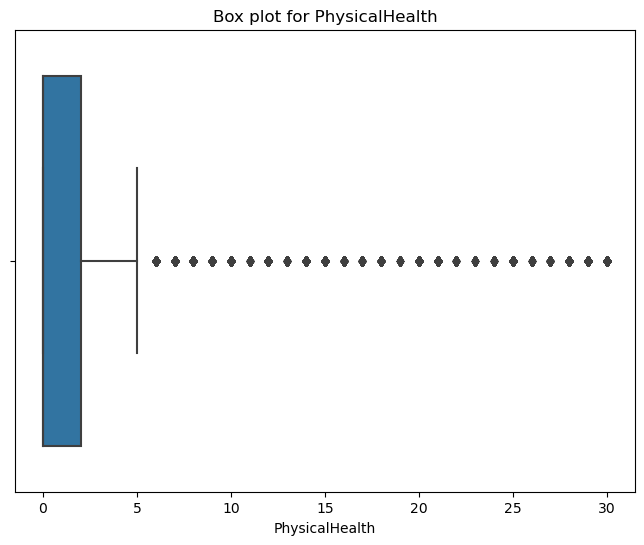

Summary statistics for PhysicalHealth:
count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64
Number of outliers for PhysicalHealth: 45876
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
2                No  26.58     Yes              No     No            20.0   
4                No  23.71      No              No     No            28.0   
6                No  21.63      No              No     No            15.0   
10              Yes  34.30     Yes              No     No            30.0   
13               No  28.15      No              No     No             7.0   
...             ...    ...     ...             ...    ...             ...   
319774           No  20.36      No              No     No            30.0   
319779           No  23.38     Yes              No     No            30.0   
319782    

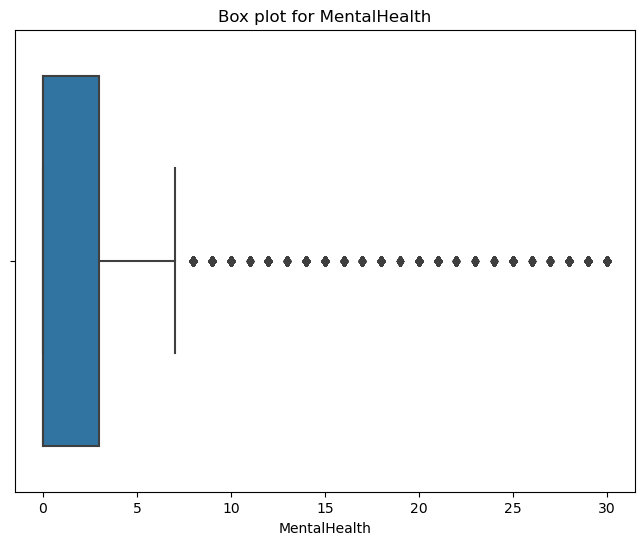

Summary statistics for MentalHealth:
count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64
Number of outliers for MentalHealth: 50279
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
2                No  26.58     Yes              No     No            20.0   
14               No  29.29     Yes              No     No             0.0   
17               No  22.59     Yes              No     No             0.0   
22               No  26.17     Yes              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319734           No  29.26      No              No     No             1.0   
319754           No  26.95      No              No     No             0.0   
319760  

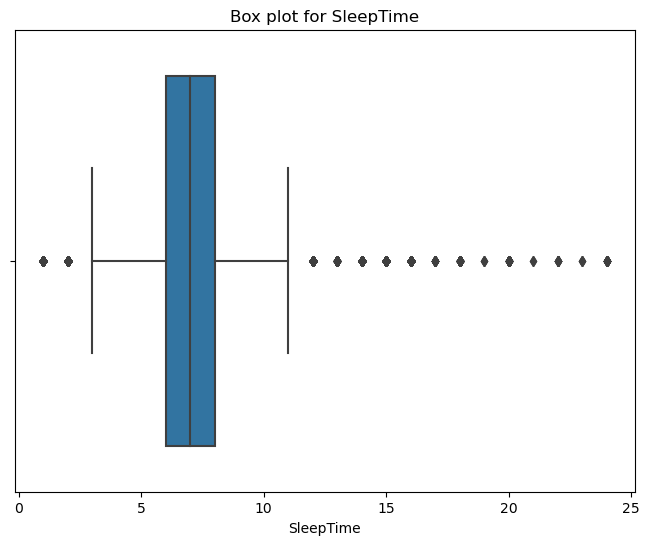

Summary statistics for SleepTime:
count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64
Number of outliers for SleepTime: 1550
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
10              Yes  34.30     Yes              No     No            30.0   
262              No  32.78      No              No     No             0.0   
581              No  32.95      No              No     No            30.0   
618              No  46.68      No              No     No            30.0   
718              No  19.79     Yes              No    Yes            30.0   
...             ...    ...     ...             ...    ...             ...   
318988           No  26.07      No              No     No            20.0   
319229           No  29.63     Yes             Yes     No            14.0   
319290           N

In [32]:
# Outlier analysis for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    # Box plot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for {col}')
    plt.show()

    # Summary statistics
    print(f"Summary statistics for {col}:")
    print(df[col].describe())

    # Outlier detection using IQR method with increased threshold
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    # Increase the multiplier to widen the threshold for outliers
    lower_bound = q1 - 2.0 * iqr  # Adjust multiplier as needed
    upper_bound = q3 + 2.0 * iqr  # Adjust multiplier as needed

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers for {col}: {outliers.shape[0]}")
    print(outliers)

    # Drop outliers from the DataFrame (you may choose to handle outliers differently)
    # df = df.drop(outliers.index)


In [33]:
df.shape

(319795, 18)

In [34]:
from scipy.stats import ttest_ind

# Load the dataset
address = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(address)

# Map 'Yes' to 1 and 'No' to 0 in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Define groups based on smoking status
smoking_group = df[df['Smoking'] == 'Yes']['HeartDisease']
non_smoking_group = df[df['Smoking'] == 'No']['HeartDisease']

# Perform t-test
t_statistic, p_value = ttest_ind(smoking_group, non_smoking_group)

# Print results
print(f"T-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between smoking and non-smoking groups in terms of heart disease.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between smoking and non-smoking groups in terms of heart disease.")
#In a t-test, a low p-value suggests a significant difference between groups.


T-test statistic: 61.297861168863285
P-value: 0.0
Reject the null hypothesis - There is a significant difference between smoking and non-smoking groups in terms of heart disease.


In [35]:

# Load the dataset
address = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(address)

# Map 'Yes' to 1 and 'No' to 0 in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Define groups based on smoking status
male_group = df[df['Sex'] == 'Male']['HeartDisease']
female_group = df[df['Sex'] == 'Female']['HeartDisease']

# Perform t-test
t_statistic, p_value = ttest_ind(male_group, female_group)

# Print results
print(f"T-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between groups in terms of heart disease.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between  groups in terms of heart disease.")
#In a t-test, a low p-value suggests a significant difference between groups.






T-test statistic: 39.70557053587092
P-value: 0.0
Reject the null hypothesis - There is a significant difference between groups in terms of heart disease.


In [37]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
address = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(address)

# Map 'Yes' to 1 and 'No' to 0 in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Define groups based on smoking status
smoking_group = df[df['KidneyDisease'] == 'Yes']['HeartDisease']
non_smoking_group = df[df['KidneyDisease'] == 'No']['HeartDisease']

# Perform t-test
t_statistic, p_value = ttest_ind(smoking_group, non_smoking_group)

# Print results
print(f"T-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between  groups in terms of heart disease.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between  groups in terms of heart disease.")
#In a t-test, a low p-value suggests a significant difference between groups.






T-test statistic: 82.98876505538577
P-value: 0.0
Reject the null hypothesis - There is a significant difference between  groups in terms of heart disease.


In [26]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
address = "/Users/emresemercioglu/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(address)

# Map 'Yes' to 1 and 'No' to 0 in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Define groups based on smoking status
yes_group = df[df['Asthma'] == 'Yes']['HeartDisease']
no_group = df[df['Asthma'] == 'No']['HeartDisease']

# Perform t-test
t_statistic, p_value = ttest_ind(yes_group, no_group)

# Print results
print(f"T-test statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between  groups in terms of heart disease.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between groups in terms of heart disease.")
#In a t-test, a low p-value suggests a significant difference between groups.






T-test statistic: 23.456921886938197
P-value: 1.424330629199138e-121
Reject the null hypothesis - There is a significant difference between  groups in terms of heart disease.
